# Laboratorio 4

### Data Science

 Manuel Rodas 21509

1) Carga y limpieza del csv traficogt.csv

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Cargar el CSV
df = pd.read_csv("traficogt.csv")

# Visualizar las primeras filas para entender la estructura
print(df.head())

   Unnamed: 0                   id               id_str  \
0           0  1701654244858679742  1701654244858679742   
1           1  1701651855212691764  1701651855212691764   
2           2  1701348453916311903  1701348453916311903   
3           3  1701995859229958189  1701995859229958189   
4           4  1701216420997017888  1701216420997017888   

                                                 url  \
0  https://twitter.com/EmisorasUnidas/status/1701...   
1  https://twitter.com/amilcarmontejo/status/1701...   
2  https://twitter.com/edgarduarteagui/status/170...   
3  https://twitter.com/DrDavidCabrera/status/1701...   
4  https://twitter.com/EmisorasUnidas/status/1701...   

                        date  \
0  2023-09-12 17:49:21+00:00   
1  2023-09-12 17:39:52+00:00   
2  2023-09-11 21:34:15+00:00   
3  2023-09-13 16:26:49+00:00   
4  2023-09-11 12:49:36+00:00   

                                                user lang  \
0  {'id': 40256008, 'id_str': '40256008', 'url': ...  

In [3]:
# Eliminamos columnas innecesarias, como IDs, enlaces, medios, etc.
df_clean = df[['rawContent']]  # Trabajamos solo con la columna de texto

In [4]:
def limpiar_texto(texto):
    texto = re.sub(r'http\S+', '', texto)  # Eliminar URLs
    texto = re.sub(r'@\w+', '', texto)  # Eliminar menciones
    texto = re.sub(r'#\w+', '', texto)  # Eliminar hashtags
    texto = re.sub(r'[^A-Za-z0-9\s]', '', texto)  # Eliminar caracteres especiales
    return texto

df_clean['rawContent'] = df_clean['rawContent'].apply(limpiar_texto)

C:\Users\rodas\AppData\Local\Temp\ipykernel_1108\353354038.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rawContent'] = df_clean['rawContent'].apply(limpiar_texto)


In [5]:
# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words('spanish'))
df_clean['tokens'] = df_clean['rawContent'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in stop_words])

print(df_clean.head())

                                          rawContent  \
0   Amlcar Montejo director de Comunicacin de Eme...   
1  CONDUCTORA QUE SE NEG A MOVILIZAR VEHCULO ES M...   
2  Camin de arena volteado en el viaducto el pult...   
3  Paciente de 39 aos dolor lumbar de 1 ao tras c...   
4   Amlcar Montejo director de Comunicacin de Eme...   

                                              tokens  
0  [amlcar, montejo, director, comunicacin, emetr...  
1  [conductora, neg, movilizar, vehculo, multada,...  
2  [camin, arena, volteado, viaducto, pult, hacia...  
3  [paciente, 39, aos, dolor, lumbar, 1, ao, tras...  
4  [amlcar, montejo, director, comunicacin, emetr...  


C:\Users\rodas\AppData\Local\Temp\ipykernel_1108\4089187931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tokens'] = df_clean['rawContent'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in stop_words])


2) Analisis de n-gramas

In [6]:
from collections import Counter
from nltk import ngrams


In [7]:
def obtener_ngramas(texto, n):
    n_grams = ngrams(texto, n)
    return list(n_grams)

In [8]:
df_clean['bigrams'] = df_clean['tokens'].apply(lambda x: obtener_ngramas(x, 2))
df_clean['trigrams'] = df_clean['tokens'].apply(lambda x: obtener_ngramas(x, 3))

# Contar las frecuencias de n-gramas
bigrams_list = sum(df_clean['bigrams'].tolist(), [])
trigrams_list = sum(df_clean['trigrams'].tolist(), [])
bigram_counts = Counter(bigrams_list)
trigram_counts = Counter(trigrams_list)

print("Top 10 bigramas:", bigram_counts.most_common(10))
print("Top 10 trigramas:", trigram_counts.most_common(10))

C:\Users\rodas\AppData\Local\Temp\ipykernel_1108\469267626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['bigrams'] = df_clean['tokens'].apply(lambda x: obtener_ngramas(x, 2))
C:\Users\rodas\AppData\Local\Temp\ipykernel_1108\469267626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['trigrams'] = df_clean['tokens'].apply(lambda x: obtener_ngramas(x, 3))


Top 10 bigramas: [(('calle', 'zona'), 705), (('zona', '1'), 452), (('avenida', 'zona'), 421), (('zona', '10'), 288), (('zona', '11'), 256), (('zona', '18'), 206), (('inscrbete', 'hoy'), 201), (('zona', '12'), 181), (('ruta', 'atlntico'), 179), (('presidente', 'electo'), 167)]
Top 10 trigramas: [(('calle', 'zona', '1'), 233), (('calle', 'zona', '10'), 98), (('modalidad', 'lnea', 'inscrbete'), 94), (('lnea', 'inscrbete', 'hoy'), 94), (('inscrbete', 'hoy', 'obtn'), 90), (('hoy', 'obtn', 'ttulo'), 90), (('calle', 'zona', '12'), 88), (('calzada', 'aguilar', 'batres'), 79), (('avenida', 'zona', '10'), 76), (('avenida', 'zona', '11'), 72)]


3) Nube de Palabras

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [11]:
# Unimos todos los tokens en un solo string
all_words = ' '.join([' '.join(tokens) for tokens in df_clean['tokens']])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

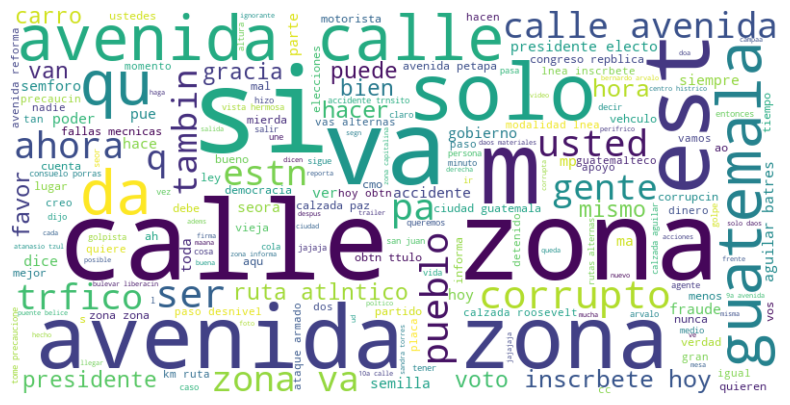

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

4) Analisis de entidades

In [21]:

import spacy
nlp = spacy.load('es_core_news_sm')

In [22]:
def extraer_entidades(texto):
    doc = nlp(texto)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [23]:
df_clean['entities'] = df_clean['rawContent'].apply(lambda x: extraer_entidades(x))

print(df_clean[['rawContent', 'entities']].head())

                                          rawContent  \
0   Amlcar Montejo director de Comunicacin de Eme...   
1  CONDUCTORA QUE SE NEG A MOVILIZAR VEHCULO ES M...   
2  Camin de arena volteado en el viaducto el pult...   
3  Paciente de 39 aos dolor lumbar de 1 ao tras c...   
4   Amlcar Montejo director de Comunicacin de Eme...   

                                            entities  
0  [(Amlcar Montejo, PER), (Comunicacin de Emetra...  
1  [(CONDUCTORA, ORG), (SE NEG A MOVILIZAR, ORG),...  
2  [(Camin, LOC), (Boulevares Acatan, PER), (Mont...  
3  [(Sugirieron, ORG), (Robot, LOC), (ADAMO\nRobo...  
4  [(Amlcar Montejo, PER), (Comunicacin de Emetra...  


C:\Users\rodas\AppData\Local\Temp\ipykernel_1108\2408324526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['entities'] = df_clean['rawContent'].apply(lambda x: extraer_entidades(x))


5) Clustering de Docuemntos

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [27]:
stop_words_spanish = stopwords.words('spanish')

In [28]:
vectorizer = TfidfVectorizer(stop_words=stop_words_spanish)

# Convertir texto a vectores TF-IDF
X = vectorizer.fit_transform(df_clean['rawContent'])

print(X.shape)  # Verifica el tamaño de la matriz TF-IDF

(12631, 19864)


In [29]:
num_clusters = 5  # Puedes ajustar el número de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(X)

In [30]:
df_clean['cluster'] = kmeans.labels_

print(df_clean[['rawContent', 'cluster']].head())

                                          rawContent  cluster
0   Amlcar Montejo director de Comunicacin de Eme...        4
1  CONDUCTORA QUE SE NEG A MOVILIZAR VEHCULO ES M...        4
2  Camin de arena volteado en el viaducto el pult...        1
3  Paciente de 39 aos dolor lumbar de 1 ao tras c...        1
4   Amlcar Montejo director de Comunicacin de Eme...        4


C:\Users\rodas\AppData\Local\Temp\ipykernel_1108\2947979966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = kmeans.labels_


6) Modelado de Topicos con LDA

In [31]:
from sklearn.decomposition import LatentDirichletAllocation

In [32]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [33]:
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Tópico {idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-10 - 1:-1]]))

Tópico 0:
zona calle avenida va informa hacia precaucin paso calzada 10
Tópico 1:
si presidente the jajaja ms deben golpistas ser nadie ley
Tópico 2:
si ms pueblo da est hoy vieja and your guatemala
Tópico 3:
presidente si corruptos ms pueblo as dignidad vergenza ridculo haciendo
Tópico 4:
si you ms gracias guatemala ser elecciones pueblo van bien


7) Analisis de Co-Ocurrencias

In [34]:
import networkx as nx

In [55]:
top_n = 150

co_occurrences = Counter(bigrams_list)
top_co_occurrences = dict(sorted(co_occurrences.items(), key=lambda item: item[1], reverse=True)[:top_n])
G = nx.Graph()

In [56]:
for (word1, word2), freq in top_co_occurrences.items():
    G.add_edge(word1, word2, weight=freq)

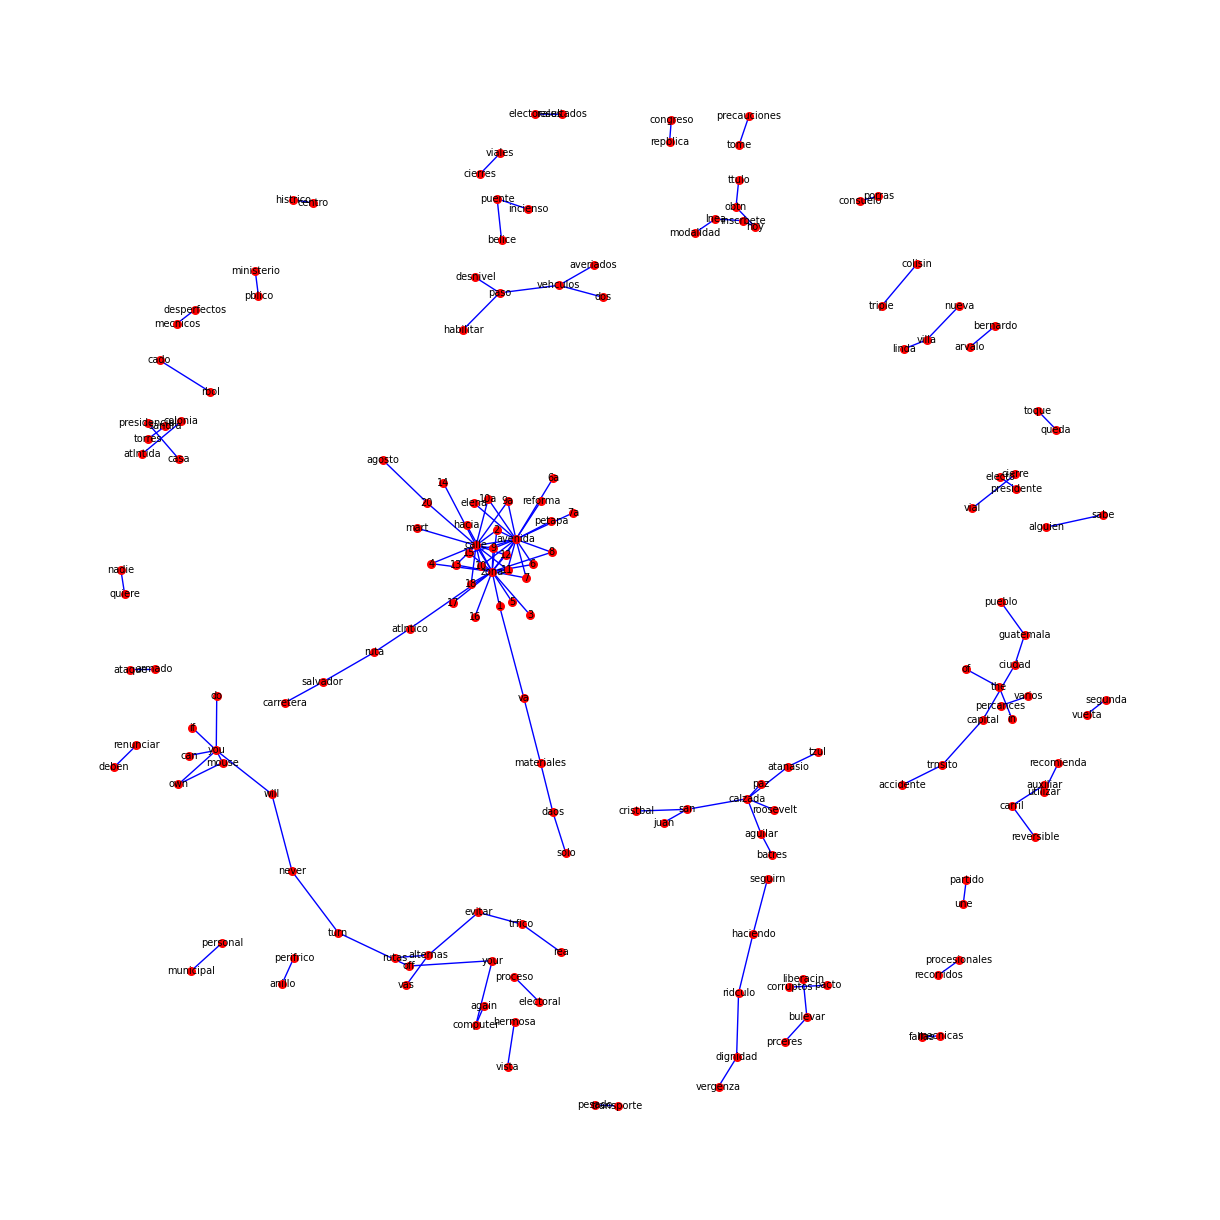

In [57]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=30, font_size=7, edge_color='b', node_color='r')
plt.show()